In [1]:
import tensorflow 
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input
import vis_helper as v

2022-03-23 08:07:21.404963: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/openvino_2021/data_processing/dl_streamer/lib:/opt/intel/openvino_2021/data_processing/gstreamer/lib:/opt/intel/openvino_2021/opencv/lib:/opt/intel/openvino_2021/deployment_tools/ngraph/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/tbb/lib::/opt/intel/openvino_2021/deployment_tools/inference_engine/external/hddl/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/omp/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/gna/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/mkltiny_lnx/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/lib/intel64
2022-03-23 08:07:21.404984: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore ab

## Prepare dataset

In [2]:
X1 = np.arange(0, 136, 3)[1:]
X2 = np.arange(0, 226, 5)[1:]

X = np.column_stack([X1, X2])
X = X.reshape(15, 3, 2)


y = []
for i in X:
    y.append(np.sum(i[2]))
    print(i, np.sum(i[2]))
    print()

y = np.array(y)

# print("X: ", X)
# print("y: ", y)

[[ 3  5]
 [ 6 10]
 [ 9 15]] 24

[[12 20]
 [15 25]
 [18 30]] 48

[[21 35]
 [24 40]
 [27 45]] 72

[[30 50]
 [33 55]
 [36 60]] 96

[[39 65]
 [42 70]
 [45 75]] 120

[[48 80]
 [51 85]
 [54 90]] 144

[[ 57  95]
 [ 60 100]
 [ 63 105]] 168

[[ 66 110]
 [ 69 115]
 [ 72 120]] 192

[[ 75 125]
 [ 78 130]
 [ 81 135]] 216

[[ 84 140]
 [ 87 145]
 [ 90 150]] 240

[[ 93 155]
 [ 96 160]
 [ 99 165]] 264

[[102 170]
 [105 175]
 [108 180]] 288

[[111 185]
 [114 190]
 [117 195]] 312

[[120 200]
 [123 205]
 [126 210]] 336

[[129 215]
 [132 220]
 [135 225]] 360



## Hyperparameters

In [3]:
EPOCHS = 2000
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

## Solution via Simple LSTM

In [4]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 2)))
model.add(Dense(1))

2022-03-23 08:07:22.528940: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-23 08:07:22.529153: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/openvino_2021/data_processing/dl_streamer/lib:/opt/intel/openvino_2021/data_processing/gstreamer/lib:/opt/intel/openvino_2021/opencv/lib:/opt/intel/openvino_2021/deployment_tools/ngraph/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/tbb/lib::/opt/intel/openvino_2021/deployment_tools/inference_engine/external/hddl/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/omp/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/gna/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/mkltiny_lnx/lib:/opt/intel/openvino_2021/deployment

In [5]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10600     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

2022-03-23 08:07:22.609942: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-23 08:07:22.630049: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2803200000 Hz


## Training Plot

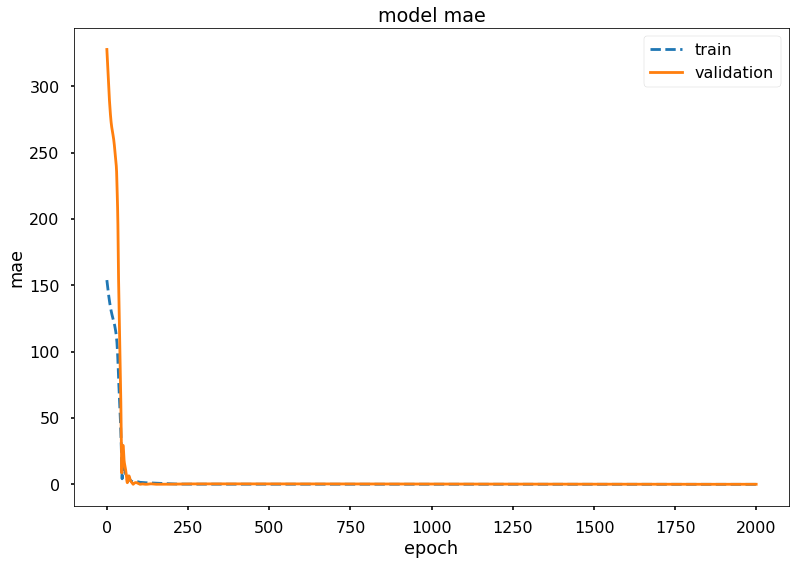

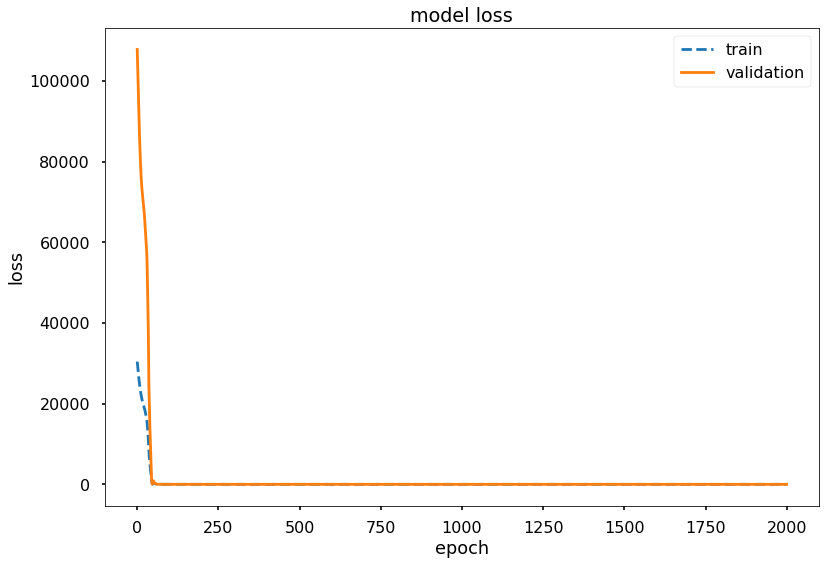

In [8]:
v.plot(history)

## Predictions

In [9]:
test_input = np.array([[8, 51],
                    [11,56],
                    [14,61]])

test_input = test_input.reshape((1, 3, 2))
test_output = model.predict(test_input, verbose=0)

print("Actual: ", test_output)
print("Predicted: ", np.sum(test_input[0][2]))

Actual:  [[67.32679]]
Predicted:  75


___

## Solution via Stacked LSTM

In [10]:
model = Sequential()
inputs = Input(shape=(3, 2))
model.add(inputs)
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 200)            162400    
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 100)            120400    
_________________________________________________________________
lstm_3 (LSTM)                (None, 3, 50)             30200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [13]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

## Training Plot

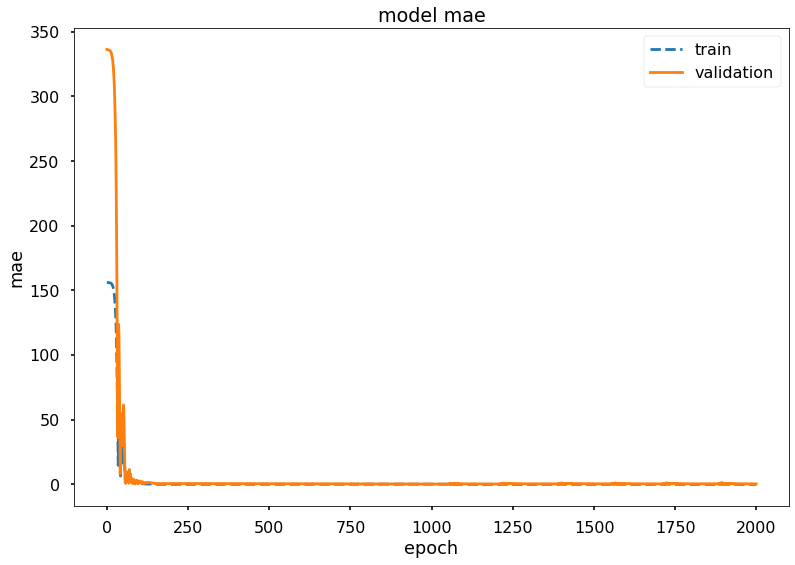

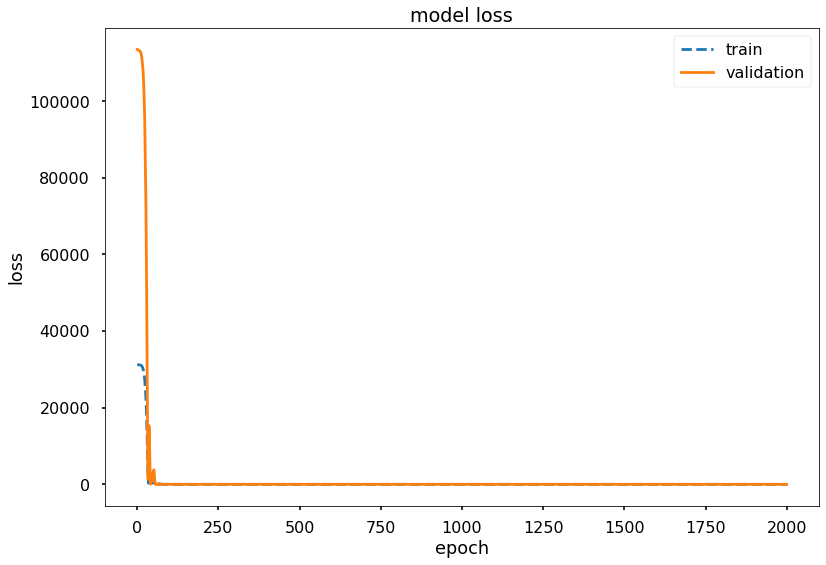

In [14]:
v.plot(history)

## Predictions

In [15]:
test_input = np.array([[8, 51],
                    [11,56],
                    [14,61]])

test_input = test_input.reshape((1, 3, 2))
test_output = model.predict(test_input, verbose=0)

print("Actual: ", test_output)
print("Predicted: ", np.sum(test_input[0][2]))

Actual:  [[77.997025]]
Predicted:  75


## Solution via Bidirectional LSTM

In [16]:
model = Sequential()
inputs = Input(shape=(3, 2))
model.add(inputs)
model.add(Bidirectional(LSTM(200, activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(100, activation='relu')))
model.add(Dense(50))
model.add(Dense(20))
model.add(Dense(1))

In [17]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 3, 400)            324800    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               400800    
_________________________________________________________________
dense_4 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 736,691
Trainable params: 736,691
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

## Training Plot

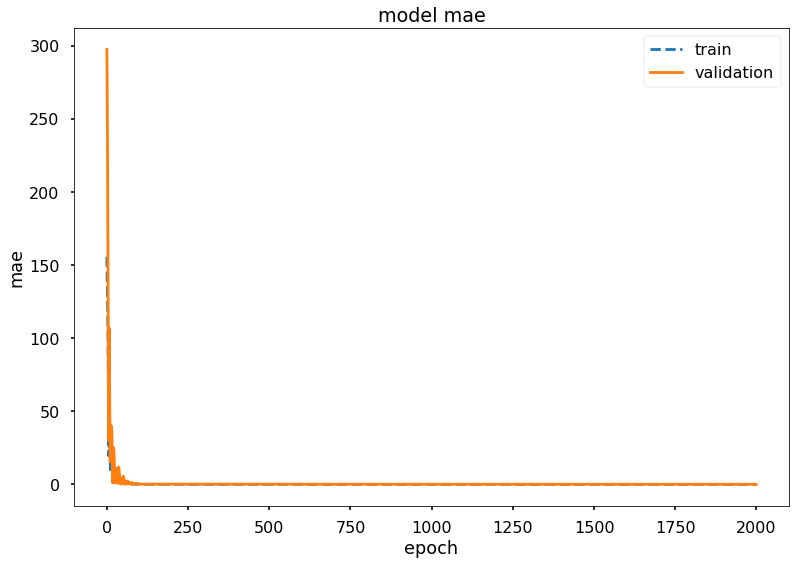

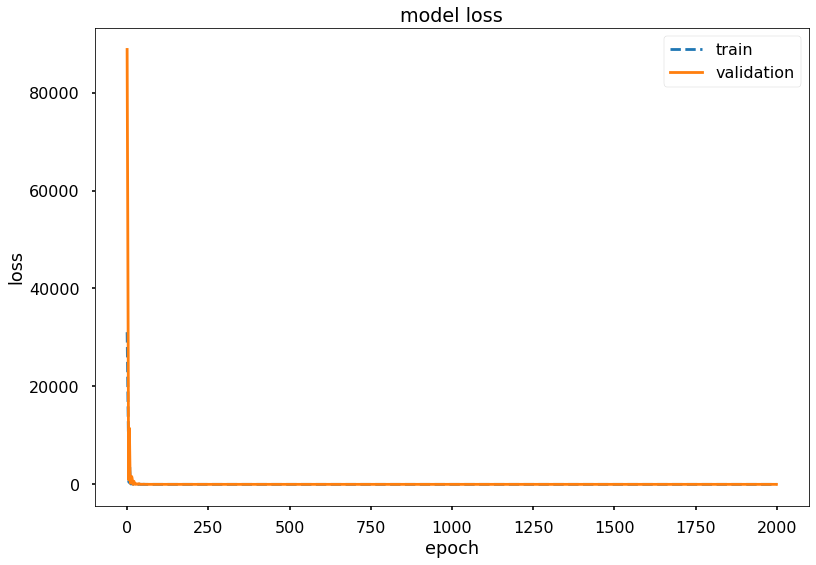

In [20]:
v.plot(history)

## Predictions

In [21]:
test_input = np.array([[8, 51],
                    [11,56],
                    [14,61]])

test_input = test_input.reshape((1, 3, 2))
test_output = model.predict(test_input, verbose=0)

print("Actual: ", test_output)
print("Predicted: ", np.sum(test_input[0][2]))

Actual:  [[79.22359]]
Predicted:  75


____

# Another variation
* Output has 2 values, one for each feature

## Prepare dataset

In [22]:
y = []
for i in X:
    y.append([i[2][0], i[2][1]])

y = np.array(y)

print("X: ", X)
print("y: ", y)

X:  [[[  3   5]
  [  6  10]
  [  9  15]]

 [[ 12  20]
  [ 15  25]
  [ 18  30]]

 [[ 21  35]
  [ 24  40]
  [ 27  45]]

 [[ 30  50]
  [ 33  55]
  [ 36  60]]

 [[ 39  65]
  [ 42  70]
  [ 45  75]]

 [[ 48  80]
  [ 51  85]
  [ 54  90]]

 [[ 57  95]
  [ 60 100]
  [ 63 105]]

 [[ 66 110]
  [ 69 115]
  [ 72 120]]

 [[ 75 125]
  [ 78 130]
  [ 81 135]]

 [[ 84 140]
  [ 87 145]
  [ 90 150]]

 [[ 93 155]
  [ 96 160]
  [ 99 165]]

 [[102 170]
  [105 175]
  [108 180]]

 [[111 185]
  [114 190]
  [117 195]]

 [[120 200]
  [123 205]
  [126 210]]

 [[129 215]
  [132 220]
  [135 225]]]
y:  [[  9  15]
 [ 18  30]
 [ 27  45]
 [ 36  60]
 [ 45  75]
 [ 54  90]
 [ 63 105]
 [ 72 120]
 [ 81 135]
 [ 90 150]
 [ 99 165]
 [108 180]
 [117 195]
 [126 210]
 [135 225]]


## Solution via a stack of Bidirectional + Dense

In [23]:
model = Sequential()
inputs = Input(shape=(3, 2))
model.add(inputs)
model.add(Bidirectional(LSTM(200, activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(100, activation='relu', return_sequences=False)))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2))

In [24]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 3, 400)            324800    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               400800    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 102       
Total params: 750,852
Trainable params: 750,852
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

## Training Plot

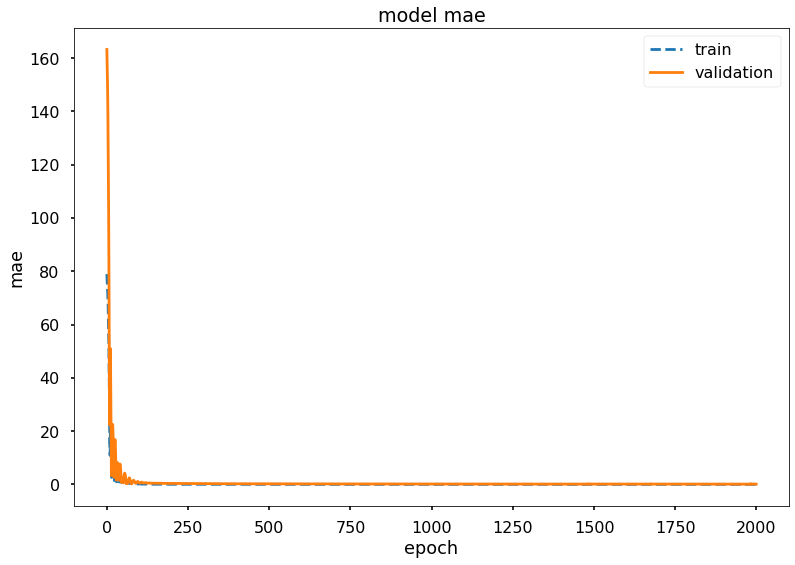

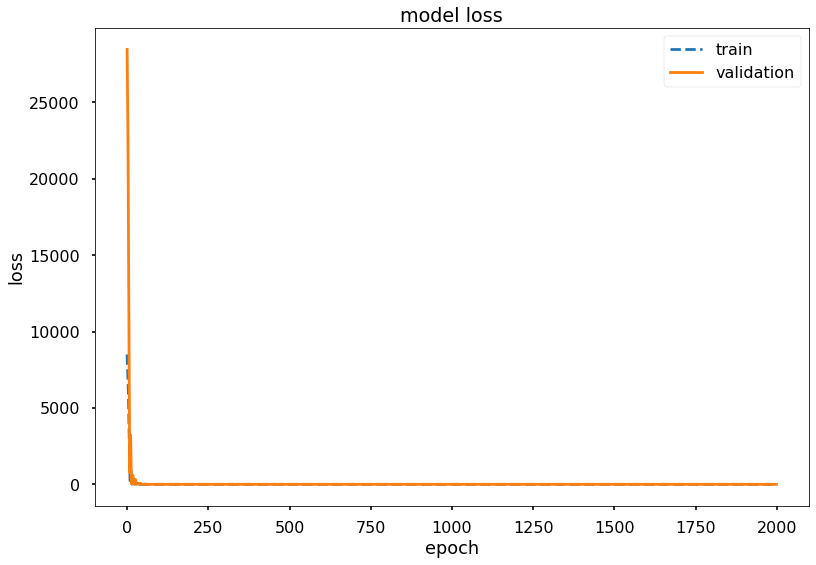

In [27]:
v.plot(history)

## Predictions

In [29]:
test_input = np.array([[20,34],
                    [23,39],
                    [26,44]])

test_input = test_input.reshape((1, 3, 2))
test_output = model.predict(test_input, verbose=0)
print("Actual: ", test_input[0][2])
print("Predicted: ", test_output)

Actual:  [26 44]
Predicted:  [[26.24984 43.77293]]


___